# Preprocessing and More EDA

In [74]:
import pandas as pd
import numpy as np
import sktime
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [100]:
df = pd.read_csv('../data/cleaned/campus5.csv', index_col='Timestamp')
df.index = pd.to_datetime(df.index)

In [101]:
df5.index[0]

Timestamp('2020-01-01 06:45:00', freq='15T')

In [102]:
df.index[-1]

Timestamp('2022-04-23 23:45:00')

In [103]:
df.index[-1] - df.index[0]

Timedelta('843 days 23:30:00')

In [110]:
# Only examining Solar Generation in these models
df = df[['SolarGeneration']]

<AxesSubplot: xlabel='Timestamp'>

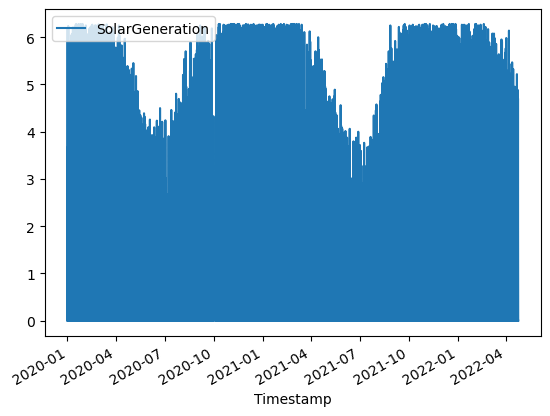

In [111]:
df.plot()

<AxesSubplot: xlabel='Timestamp'>

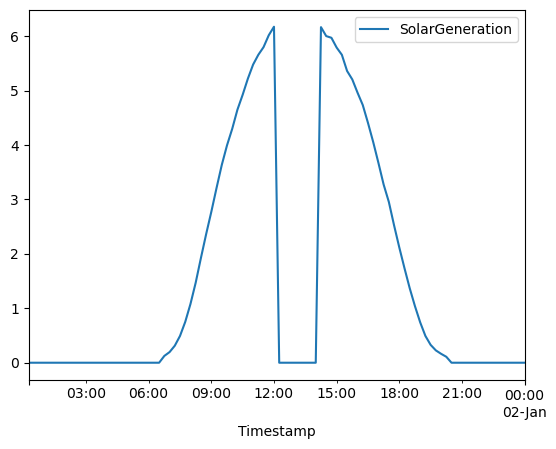

In [118]:
df[:96].plot()

<AxesSubplot: xlabel='Timestamp'>

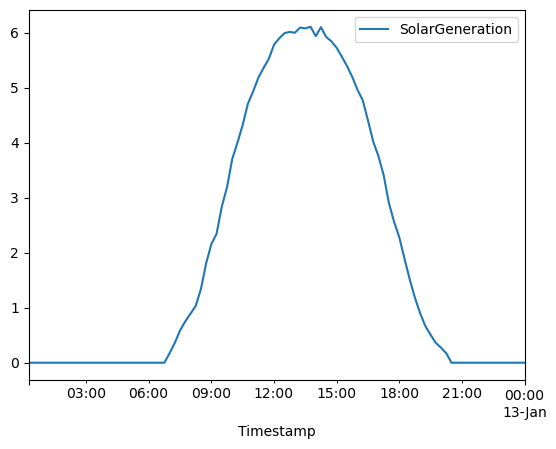

In [117]:
df[1056:1152].plot()

In [36]:
y_train, y_test = temporal_train_test_split(df['SolarGeneration'], test_size=0.15)

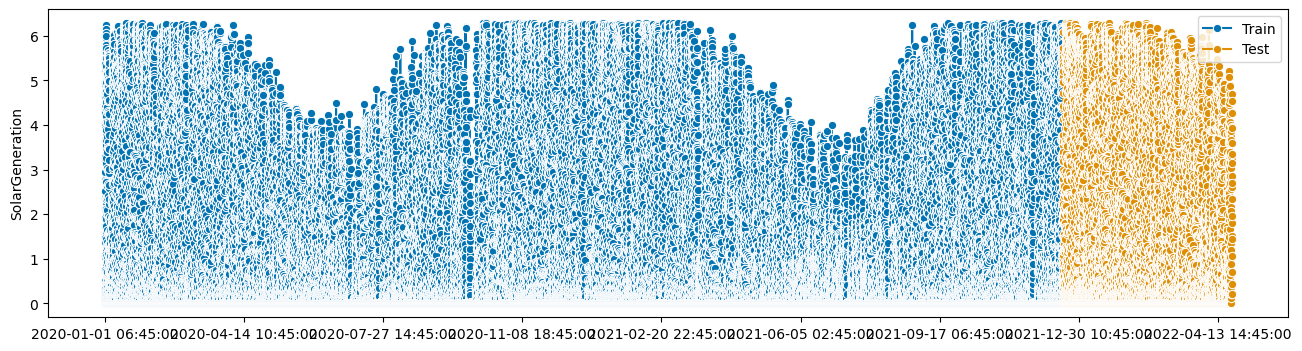

In [37]:
plot_series(y_train, y_test, labels = ['Train', 'Test']);

In [38]:
baseline = NaiveForecaster()
baseline.fit(y_train)
baseline_preds = baseline.predict(y_test.index)

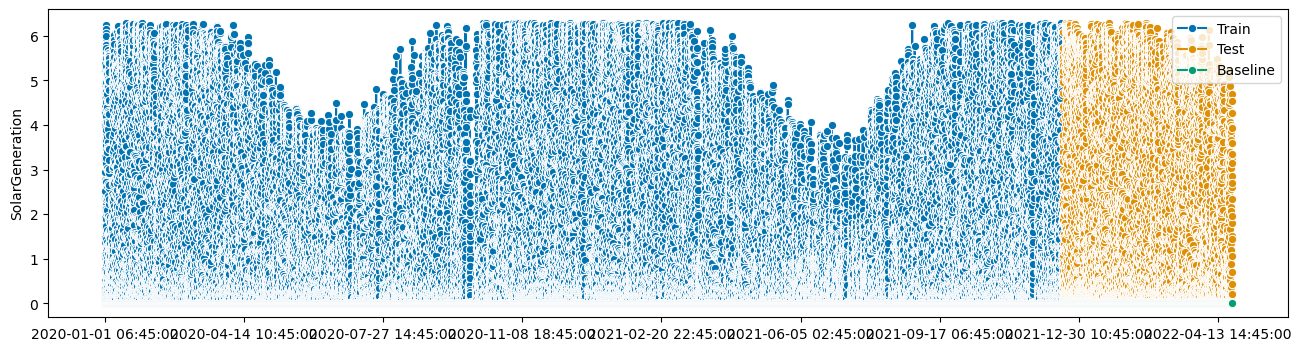

In [23]:
plot_series(y_train, y_test, baseline_preds, labels = ['Train', 'Test', 'Baseline']);

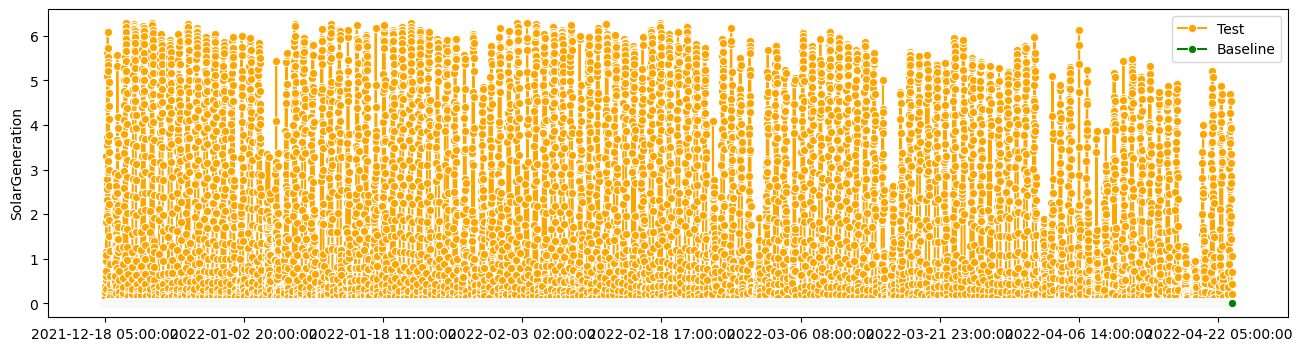

In [108]:
plot_series(y_test, baseline_preds, labels = ['Test', 'Baseline'], colors = ['orange', 'green']);

In [12]:
mean_squared_error(y_test.values, baseline_preds.values, squared = False)

2.4482406855186354

In [15]:
hourly = df['SolarGeneration'].resample('H').mean()

<AxesSubplot: >

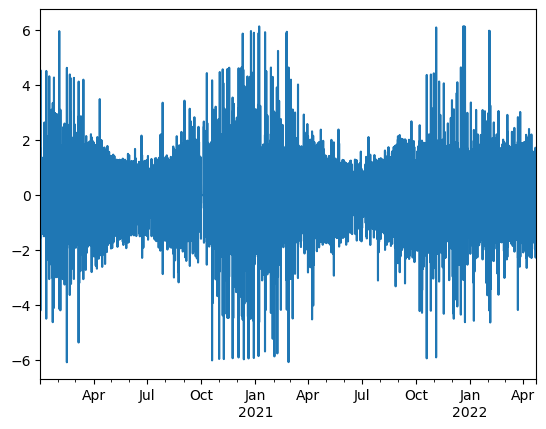

In [16]:
hourly.diff().plot()

<AxesSubplot: >

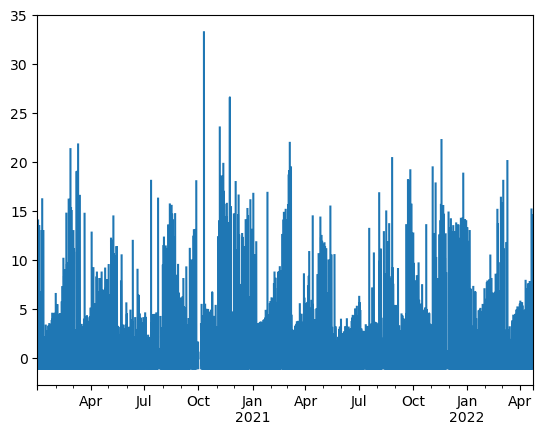

In [17]:
hourly.pct_change().plot()

In [18]:
hourly.pct_change().fillna(0).describe()

count    2.024400e+04
mean              inf
std               NaN
min     -1.000000e+00
25%     -2.108483e-02
50%      0.000000e+00
75%      5.049457e-02
max               inf
Name: SolarGeneration, dtype: float64

In [19]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [22]:
interpret_dftest(adfuller(hourly))

Test Statistic   -9.586304e+00
p-value           2.092826e-16
dtype: float64

In [26]:
interpret_dftest(adfuller(hourly.diff().dropna()))

Test Statistic   -37.33542
p-value            0.00000
dtype: float64

---
The Augmented Dickey-Fuller Test shows that the original data is stationary. So for ARIMA models, the d parameter will equal 0.